In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

state = 'OH_PA'
# Folder path where CSV files are located
folder_path = "C:/Users/malam24/Box/Evaluation/LULC_Streamflow_SA/ROSET-AWS/ROSET-AWS/SEED_data/"

#Decide the analysis type between "Drought" and "Flood"
# analysis_type = 'Drought'
analysis_type = 'Flood'

# List of CSV files with corresponding years
csv_files_years = {
    f"result_reach_{state}_2Yr_{analysis_type}.csv": 2,
    f"result_reach_{state}_5Yr_{analysis_type}.csv": 5,
    f"result_reach_{state}_10Yr_{analysis_type}.csv": 10,
    f"result_reach_{state}_25Yr_{analysis_type}.csv": 25,
    f"result_reach_{state}_50Yr_{analysis_type}.csv": 50,
    f"result_reach_{state}_100Yr_{analysis_type}.csv": 100
}

# Full path to each CSV file
csv_paths = [os.path.join(folder_path, csv_file) for csv_file in csv_files_years.keys()]

# Define KGE ranges and colors
kge_ranges = {
    '0.75 to 1': (0.75, 1),
    '0.5 to 0.75': (0.5, 0.75),
    '0 to 0.5': (0, 0.5),
    '-0.41 to 0': (-0.41, 0),
    'Less than -0.41': (-np.inf, -0.41)
}

# Create an empty DataFrame to store counts
count_df = pd.DataFrame(index=csv_files_years.values(), columns=kge_ranges.keys())

# Loop through each CSV file
for i, (csv_path, years) in enumerate(zip(csv_paths, csv_files_years.values())):
    # Read CSV file
    df = pd.read_csv(csv_path)

    # Loop through KGE ranges
    for j, (range_name, (lower, upper)) in enumerate(kge_ranges.items()):
        # Count values within the range
        count = ((df['KGE'] > lower) & (df['KGE'] <= upper)).sum()

        # Update the count in the DataFrame
        count_df.at[years, range_name] = count

# Display the count DataFrame
print("Count DataFrame:")
print(count_df)

Count DataFrame:
    0.75 to 1 0.5 to 0.75 0 to 0.5 -0.41 to 0 Less than -0.41
2          15          32       61         20              13
5          12          35       65         15              14
10         11          32       62         21              15
25         25          37       49         12              18
50         31          32       53         12              13
100        34          29       47         16              15


In [4]:
count_df["Row_Percentage"] = count_df.sum(axis=1)
count_df = count_df.div(count_df["Row_Percentage"], axis=0) * 100
count_df = count_df.drop("Row_Percentage", axis=1)
count_df

,0.75 to 1,0.5 to 0.75,0 to 0.5,-0.41 to 0,Less than -0.41
2,10.638298,22.695035,43.262411,14.184397,9.219858
5,8.510638,24.822695,46.099291,10.638298,9.929078
10,7.801418,22.695035,43.971631,14.893617,10.638298
25,17.730496,26.241135,34.751773,8.510638,12.765957
50,21.985816,22.695035,37.588652,8.510638,9.219858
100,24.113475,20.567376,33.333333,11.347518,10.638298


In [5]:
import pandas as pd

# # Your data
# data = {
#     0.75: [1, 0, 1, 0, 0],
#     0.5: [4, 3, 1, 0, 0],
#     0: [16, 19, 14, 14, 9],
#     -0.41: [26, 20, 26, 15, 14],
#     'Less than -0.41': [87, 87, 87, 91, 94]
# }

# # Create the DataFrame
# df = pd.DataFrame(data)

df = count_df

# Add a column for Return interval
df['Return interval'] = df.index

# Melt the DataFrame to merge count values
df_melted = pd.melt(df, id_vars='Return interval', var_name='Class', value_name='Count')

# Map the Class values
class_mapping = {
    0.75: 'Very Good',
    0.5: 'Good',
    0: 'Fair',
    -0.41: 'Reasonable',
    'Less than -0.41': 'Unacceptable'
}
df_melted['Class'] = df_melted['Class'].map(class_mapping)

# Replace values in the 'Return interval' column
replace_mapping = {
    0: 2,
    1: 5,
    2: 10,
    3: 25,
    4: 100
}
df_melted['Return interval'] = df_melted['Return interval'].replace(replace_mapping)

# Display the resulting DataFrame
print("Resulting DataFrame:")
print(df_melted)

df_melted["Percentage"] = df_melted["Count"] / df_melted["Count"].sum() * 100

df_melted
# df_melted["Count"].sum()

Resulting DataFrame:
    Return interval         Class      Count
0                10           NaN  10.638298
1                 5           NaN   8.510638
2                10           NaN   7.801418
3                25           NaN  17.730496
4                50           NaN  21.985816
5               100           NaN  24.113475
6                10           NaN  22.695035
7                 5           NaN  24.822695
8                10           NaN  22.695035
9                25           NaN  26.241135
10               50           NaN  22.695035
11              100           NaN  20.567376
12               10           NaN  43.262411
13                5           NaN  46.099291
14               10           NaN  43.971631
15               25           NaN  34.751773
16               50           NaN  37.588652
17              100           NaN  33.333333
18               10           NaN  14.184397
19                5           NaN  10.638298
20               10           NaN 

,Return interval,Class,Count,Percentage
0,10,NaN,10.638298,1.77305
1,5,NaN,8.510638,1.41844
2,10,NaN,7.801418,1.300236
3,25,NaN,17.730496,2.955083
4,50,NaN,21.985816,3.664303
5,100,NaN,24.113475,4.018913
6,10,NaN,22.695035,3.782506
7,5,NaN,24.822695,4.137116
8,10,NaN,22.695035,3.782506
9,25,NaN,26.241135,4.373522


In [6]:
# Build a dataset
df = pd.DataFrame({
    "name": [2, 5, 10, 25, 50, 100, 2, 5, 10, 25, 50, 100,2, 5, 10, 25, 50, 100,2, 5, 10, 25, 50, 100,2, 5, 10, 25, 50, 100],
    "value": [1, 0, 1, 0, 0, 1, 4, 3, 1, 0, 0, 0, 16, 19, 14, 14, 9, 11, 26, 20, 26, 15, 14, 14, 87, 87, 87, 91, 94, 88],
    "group": ["Very Good"] * 6 + ["Good"] * 6 + ["Fair"] * 6 + ["Reasonable"] * 6 + ["Unacceptable"] * 6
})

# Show 3 first rows
df.head(3)
df

#Replace the value column in the dataframe by the actual values (e.g., Count of KGE values in each Class/group)
# df["value"] = df_melted["Percentage"]
df["value"] = df_melted["Count"]
df

,name,value,group
0,2,10.638298,Very Good
1,5,8.510638,Very Good
2,10,7.801418,Very Good
3,25,17.730496,Very Good
4,50,21.985816,Very Good
5,100,24.113475,Very Good
6,2,22.695035,Good
7,5,24.822695,Good
8,10,22.695035,Good
9,25,26.241135,Good


In [7]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [8]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

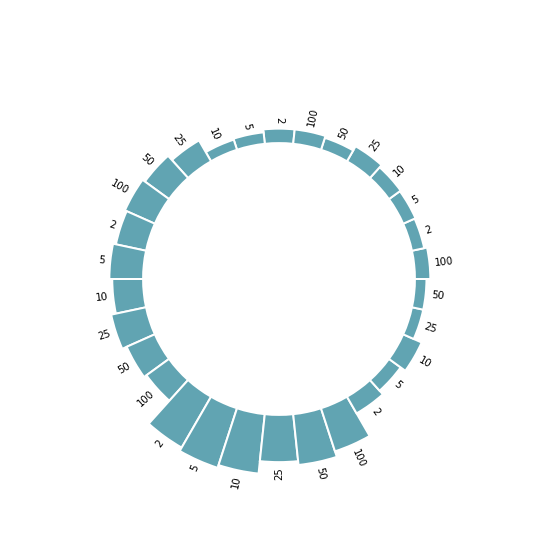

In [9]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

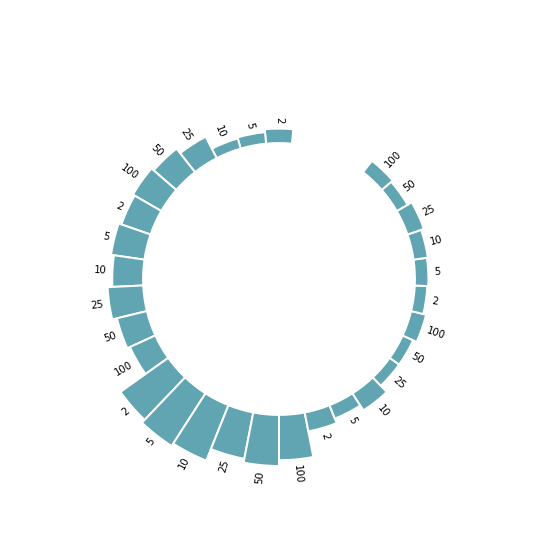

In [10]:
# 3 empty bars are added 
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# The index contains non-empty bards
IDXS = slice(0, ANGLES_N - PAD)

# The layout customization is the same as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars, subsetting angles to use only those that correspond to non-empty bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2", 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

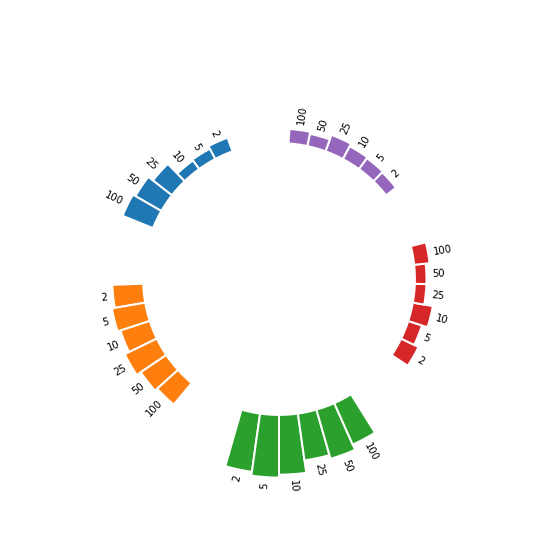

In [11]:
# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

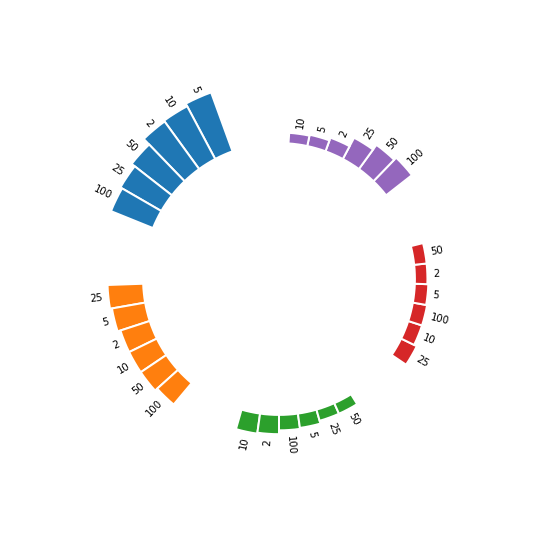

In [12]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)
VALUES = df_sorted["value"].values 
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

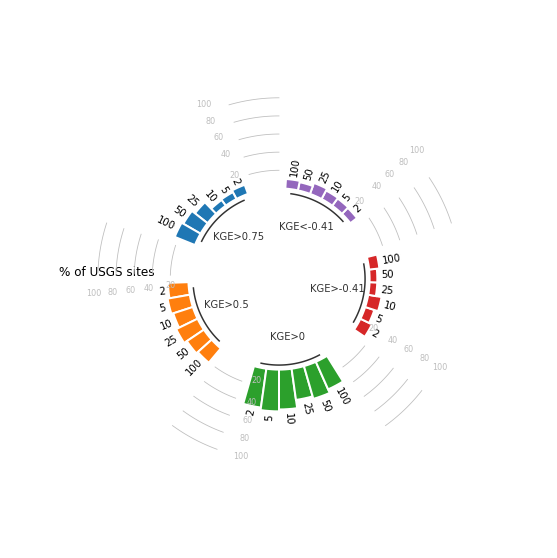

In [13]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 200)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add y-axis title with a specified rotation angle
ax.set_ylabel("% of USGS sites", fontsize=12, labelpad=-100, rotation=-360)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["KGE>0.75", "KGE>0.5", "KGE>0", "KGE>-0.41", "KGE<-0.41"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -35, group, color="#333333", fontsize=10, 
        fontweight="normal", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    
    # Add y-axis values
    ax.text(
        x1[0], 20, '20', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 45, '40', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 65, '60', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 85, '80', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 105, '100', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    
    # Add y-axis bar along the numbers
#     ax.plot([x1[0], x1[0]], [20, 105], color="#bebebe", lw=0.8)
    # Add y-axis title with a specified rotation angle
#     ax.set_ylabel("Count", fontsize=12, labelpad=-10, rotation=-360)
    
    offset += size + PAD
plt.savefig("your_plot_name.png", bbox_inches="tight", dpi=300)
plt.show()

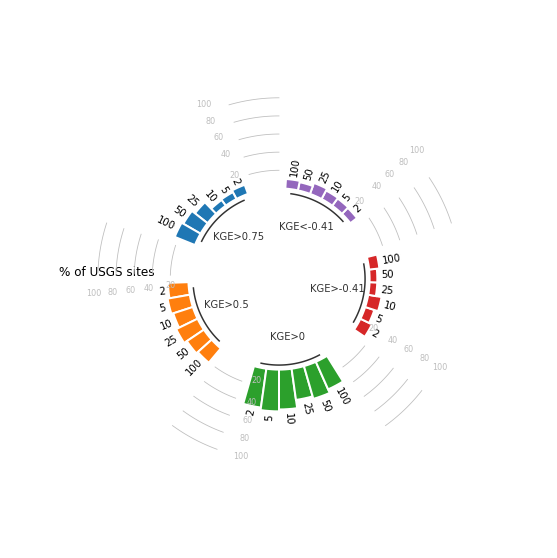

In [14]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 200)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add y-axis title with a specified rotation angle
ax.set_ylabel("% of USGS sites", fontsize=12, labelpad=-100, rotation=-360)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["KGE>0.75", "KGE>0.5", "KGE>0", "KGE>-0.41", "KGE<-0.41"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -35, group, color="#333333", fontsize=10, 
        fontweight="normal", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, 80, and 100
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    
    # Add y-axis values
    ax.text(
        x1[0], 20, '20', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 45, '40', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 65, '60', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 85, '80', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )
    ax.text(
        x1[0], 105, '100', color="#bebebe", fontsize=8, 
        fontweight="normal", ha="center", va="bottom"
    )

    offset += size + PAD

# ...

# Save plot with white background
save_path = f"C:/Users/malam24/Box/Evaluation/LULC_Streamflow_SA/ROSET-AWS/ROSET-AWS/SEED_data/Polar_{state}_{analysis_type}.png"
plt.savefig(save_path, bbox_inches="tight", dpi=300, facecolor='white')

# Show the plot
plt.show()

